In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
# import geopandas as gpd
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import numpy as np
import os
import scipy as sc
import requests
import datetime
import seaborn as sns

In [13]:
w = pd.read_csv('../traffic/T.csv')
file = pd.read_csv('../traffic/Traffic_dataset_v0.1.csv', parse_dates=['DATETIME'], date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M'))
file.head()

,ID_SENSOR,DIRECTION,DATETIME,NUM_VEHICLES,SPEED_MEAN,SPEED_SD,EVENT,LON,LAT
0,1,A,2018-09-01 02:00:00,NaN,NaN,NaN,NO_EVENT,12.291754,41.800588
1,1,A,2018-09-01 02:15:00,NaN,NaN,NaN,NO_EVENT,12.291754,41.800588
2,1,A,2018-09-01 02:30:00,NaN,NaN,NaN,NO_EVENT,12.291754,41.800588
3,1,A,2018-09-01 02:45:00,NaN,NaN,NaN,NO_EVENT,12.291754,41.800588
4,1,A,2018-09-01 03:00:00,NaN,NaN,NaN,NO_EVENT,12.291754,41.800588


In [14]:
file_new = file.dropna(subset=['NUM_VEHICLES', 'SPEED_MEAN', 'SPEED_SD'], axis=0, thresh=2)
file_new = file_new.reset_index()

In [15]:
w.drop(['Unnamed: 0', 'Unnamed: 0.1'],axis=1, inplace=True)
w

,Temp,Humidity,Wind,Precipitation,Pressure
0,24.69,0.69,5.04,rain,1014.98
1,24.78,0.69,5.02,rain,1015.01
2,24.86,0.69,5.07,rain,1015.03
3,24.95,0.69,5.18,rain,1015.06
4,25.03,0.69,5.35,rain,1015.09
5,25.11,0.67,5.48,rain,1015.09
6,25.18,0.64,5.65,rain,1015.09
7,25.25,0.61,5.87,rain,1015.08
8,25.32,0.59,6.12,rain,1015.08
9,25.21,0.59,5.81,rain,1015.05


does the average speed depend on the speed before?
(traffic jam for instance)
so we take a specific time period before and check the dependencies
we can make a model for one crossing or for all the crossings

In [16]:
file_final = pd.concat([file_new, w], axis=1)

In [17]:
file_final.drop(['index', 'Precipitation'], axis=1, inplace=True)
file_final = file_final.dropna(subset=['SPEED_SD'], axis=0)
file_final = file_final.reset_index()


# Data Analysis

In [18]:
file_final.head()

,index,ID_SENSOR,DIRECTION,DATETIME,NUM_VEHICLES,SPEED_MEAN,SPEED_SD,EVENT,LON,LAT,Temp,Humidity,Wind,Pressure
0,0,1,A,2018-09-01 08:00:00,504.0,99.3,17.19,NO_EVENT,12.291754,41.800588,24.69,0.69,5.04,1014.98
1,1,1,A,2018-09-01 08:15:00,481.0,102.1,18.12,NO_EVENT,12.291754,41.800588,24.78,0.69,5.02,1015.01
2,2,1,A,2018-09-01 08:30:00,617.0,99.2,17.91,NO_EVENT,12.291754,41.800588,24.86,0.69,5.07,1015.03
3,3,1,A,2018-09-01 08:45:00,562.0,101.7,16.62,NO_EVENT,12.291754,41.800588,24.95,0.69,5.18,1015.06
4,4,1,A,2018-09-01 09:00:00,521.0,99.7,17.06,NO_EVENT,12.291754,41.800588,25.03,0.69,5.35,1015.09


/usr/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


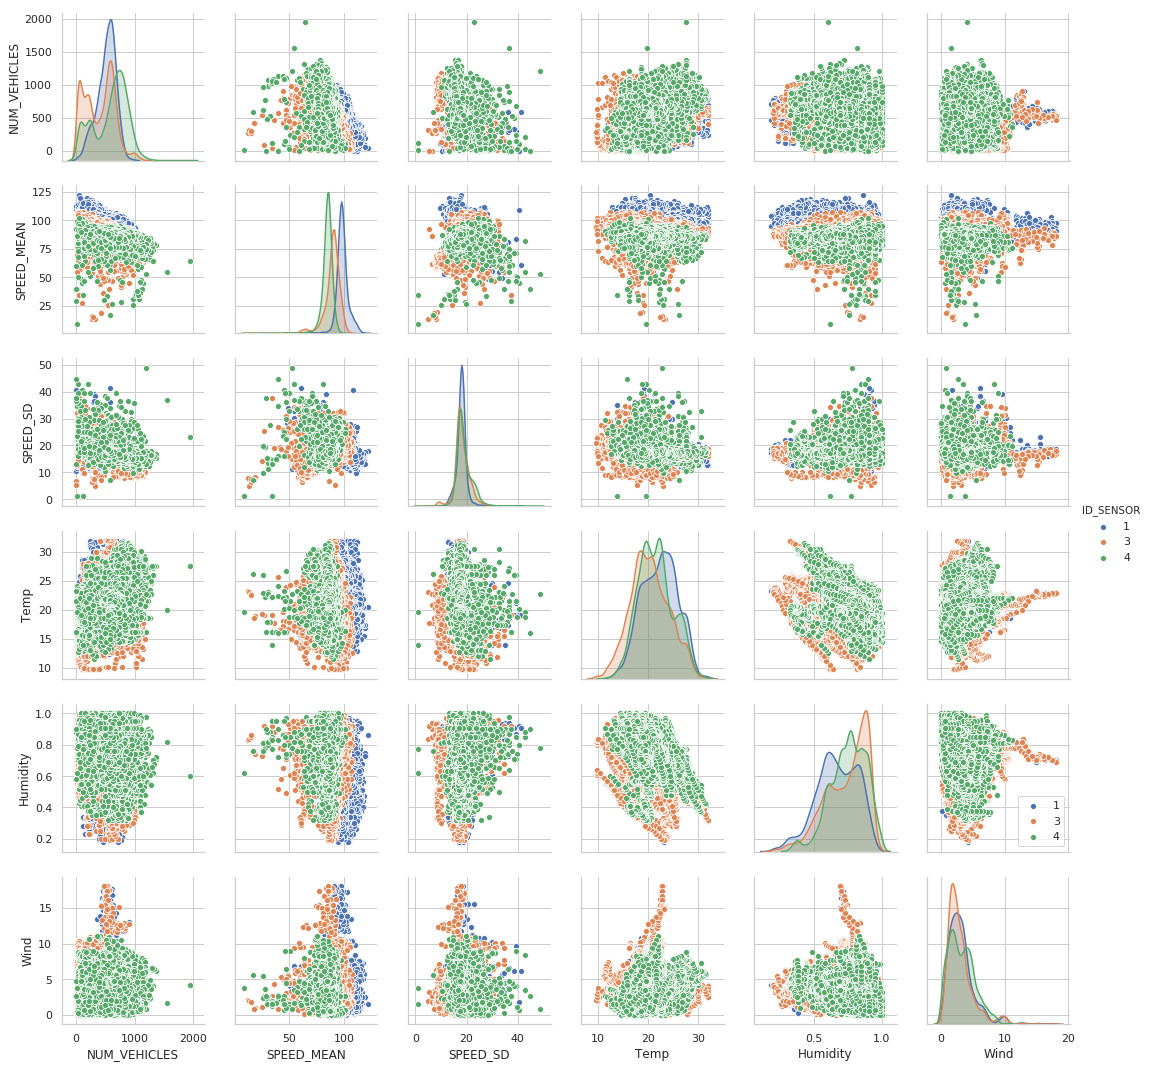

In [19]:
pal = sns.cubehelix_palette(8
                            , rot=-.5, dark=.3)
sns.pairplot(data = file_final, vars = ['NUM_VEHICLES', 'SPEED_MEAN', 'SPEED_SD', 'Temp', 'Humidity', 'Wind'], hue = 'ID_SENSOR', plot_kws={'alpha': 1})
plt.legend()

In [20]:
file_final['SPEED_SD'].isna().unique()

array([False])

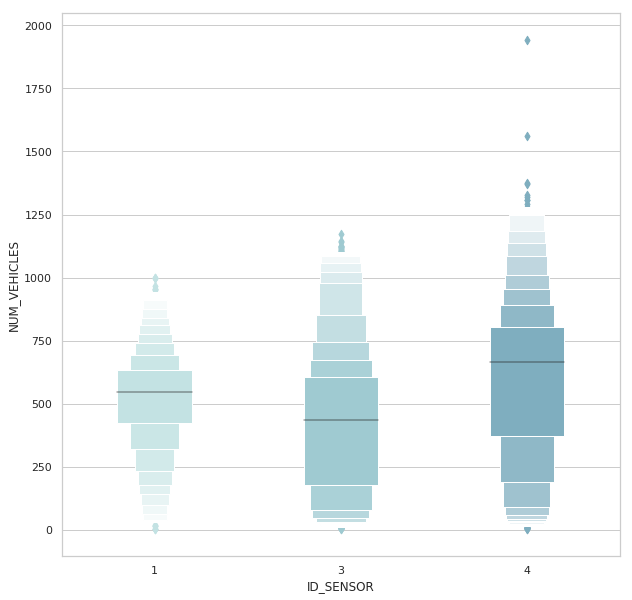

In [21]:
plt.figure(figsize=(2^8,2^8), frameon=False)
sns.set(style="whitegrid")
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Verdana'

sns.plotting_context('poster')
pal = sns.cubehelix_palette(8, rot=-.222, dark=.1)
sns.boxenplot(data = file_final, x = 'ID_SENSOR', y='NUM_VEHICLES', palette=pal, saturation=1, width = 0.4, scale='area')

In [24]:
matrix = linkage(file_final, 'single')
matrix.shape[0]

ValueError: could not convert string to float: 'A'

In [23]:
# set the number of clusters: k
wss_val = []
bss_val = []
k_val = range(1,20)

for k in k_val:
    clustering = fcluster(matrix, k, criterion='maxclust')
    centroids = [np.mean(x[clustering==c],axis=0) for c in range(1,k+1)]
    cdist(x, centroids, 'euclidean')
    D = cdist(x, centroids, 'euclidean')
    cIdx = np.argmin(D,axis=1)
    d = np.min(D,axis=1)

    avgWithinSS = sum(d)/x.shape[0]

    # Total with-in sum of square
    wss = sum(d**2)

    tss = sum(pdist(x)**2)/x.shape[0]
    
    bss = tss-wss
    
    wss_val += [wss]
    bss_val += [bss]

NameError: name 'z' is not defined